# 5. Time series analysis

Cho dữ liệu MER_T12_06.csv về phát thải khí CO2 của nhiều nguồn khác nhau, tham khảo 
tại :
https://www.kaggle.com/code/berhag/co2-emission-forecast-with-python-seasonal-arima/data

Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và chọn một thuật toán Time Series thích 
hợp để thực hiện việc dự đoán phát thải CO2 của "Natural Gas Electric Power Sector CO2 
Emissions" 36 tháng tiếp theo.
1. Thực hiện Decomposition, trực quan hóa, nhận xét. 
2. Tạo dữ liệu train/test sao cho test bao gồm dữ liệu 3 năm cuối cùng.
3. Áp dụng thuật toán phù hợp. 
4. Tìm kết quả.
5. Trực quan hóa kết quả,

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_csv('Data/MER_T12_06.csv')
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')

In [4]:
data = pd.read_csv('Data/MER_T12_06.csv', parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse)
data.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   Value         5094 non-null   object
 2   Column_Order  5094 non-null   int64 
 3   Description   5094 non-null   object
 4   Unit          5094 non-null   object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB


In [6]:
data.index

DatetimeIndex(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01', '1973-10-01',
               ...
               '2015-11-01', '2015-12-01',        'NaT', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01'],
              dtype='datetime64[ns]', name='YYYYMM', length=5094, freq=None)

In [7]:
df = data[pd.Series(pd.to_datetime(data.index, errors='coerce')).notnull().values]
df.head(5)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
df.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

Biến Value dtype là object==> Chuyển thành biến số

In [9]:
df['Value'] = pd.to_numeric(df['Value'] , errors='coerce')
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSN           4707 non-null   object 
 1   Value         4323 non-null   float64
 2   Column_Order  4707 non-null   int64  
 3   Description   4707 non-null   object 
 4   Unit          4707 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 220.6+ KB


In [11]:
df.dropna(inplace = True)
df.isnull().sum()

MSN             0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [12]:
Energy_sources = df.groupby('Description')
Energy_sources.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


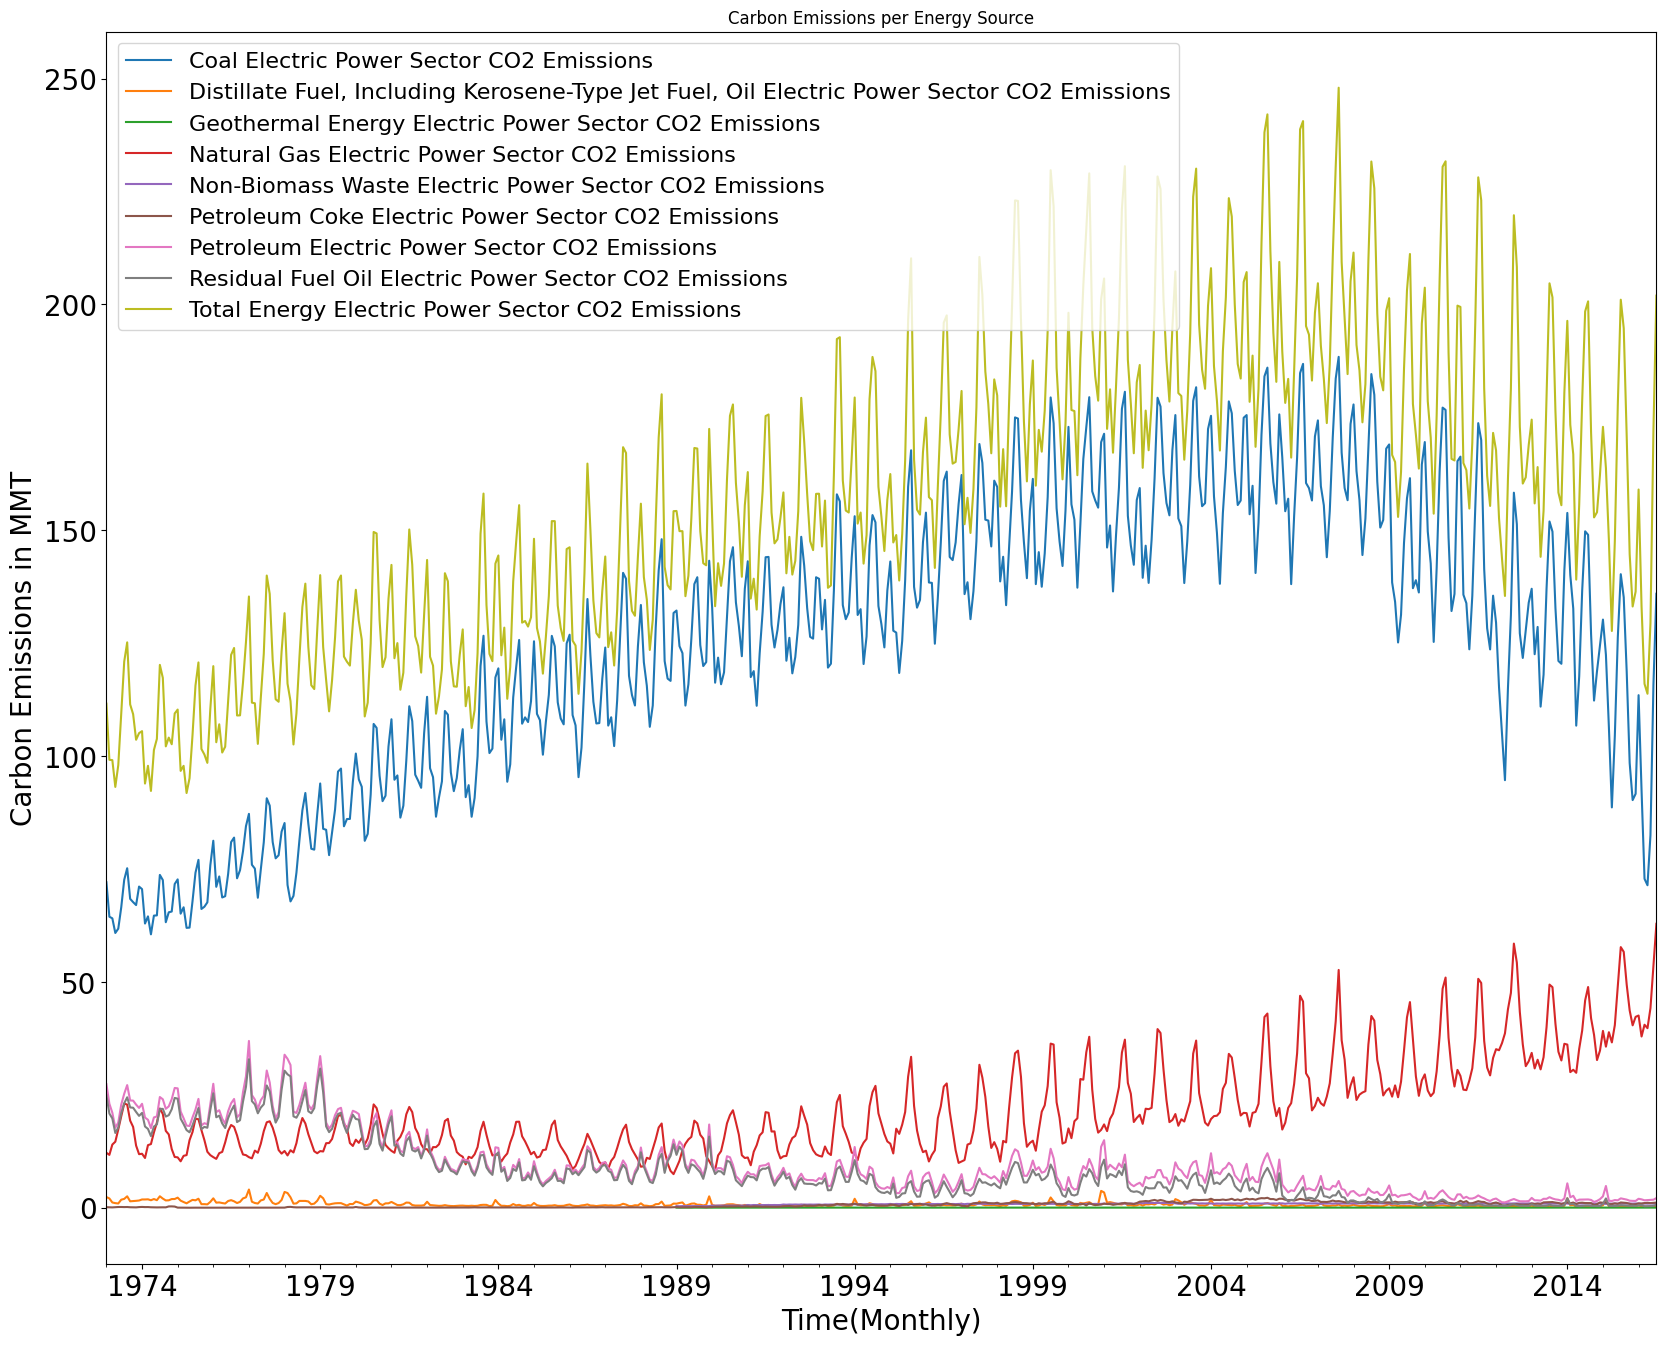

In [13]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

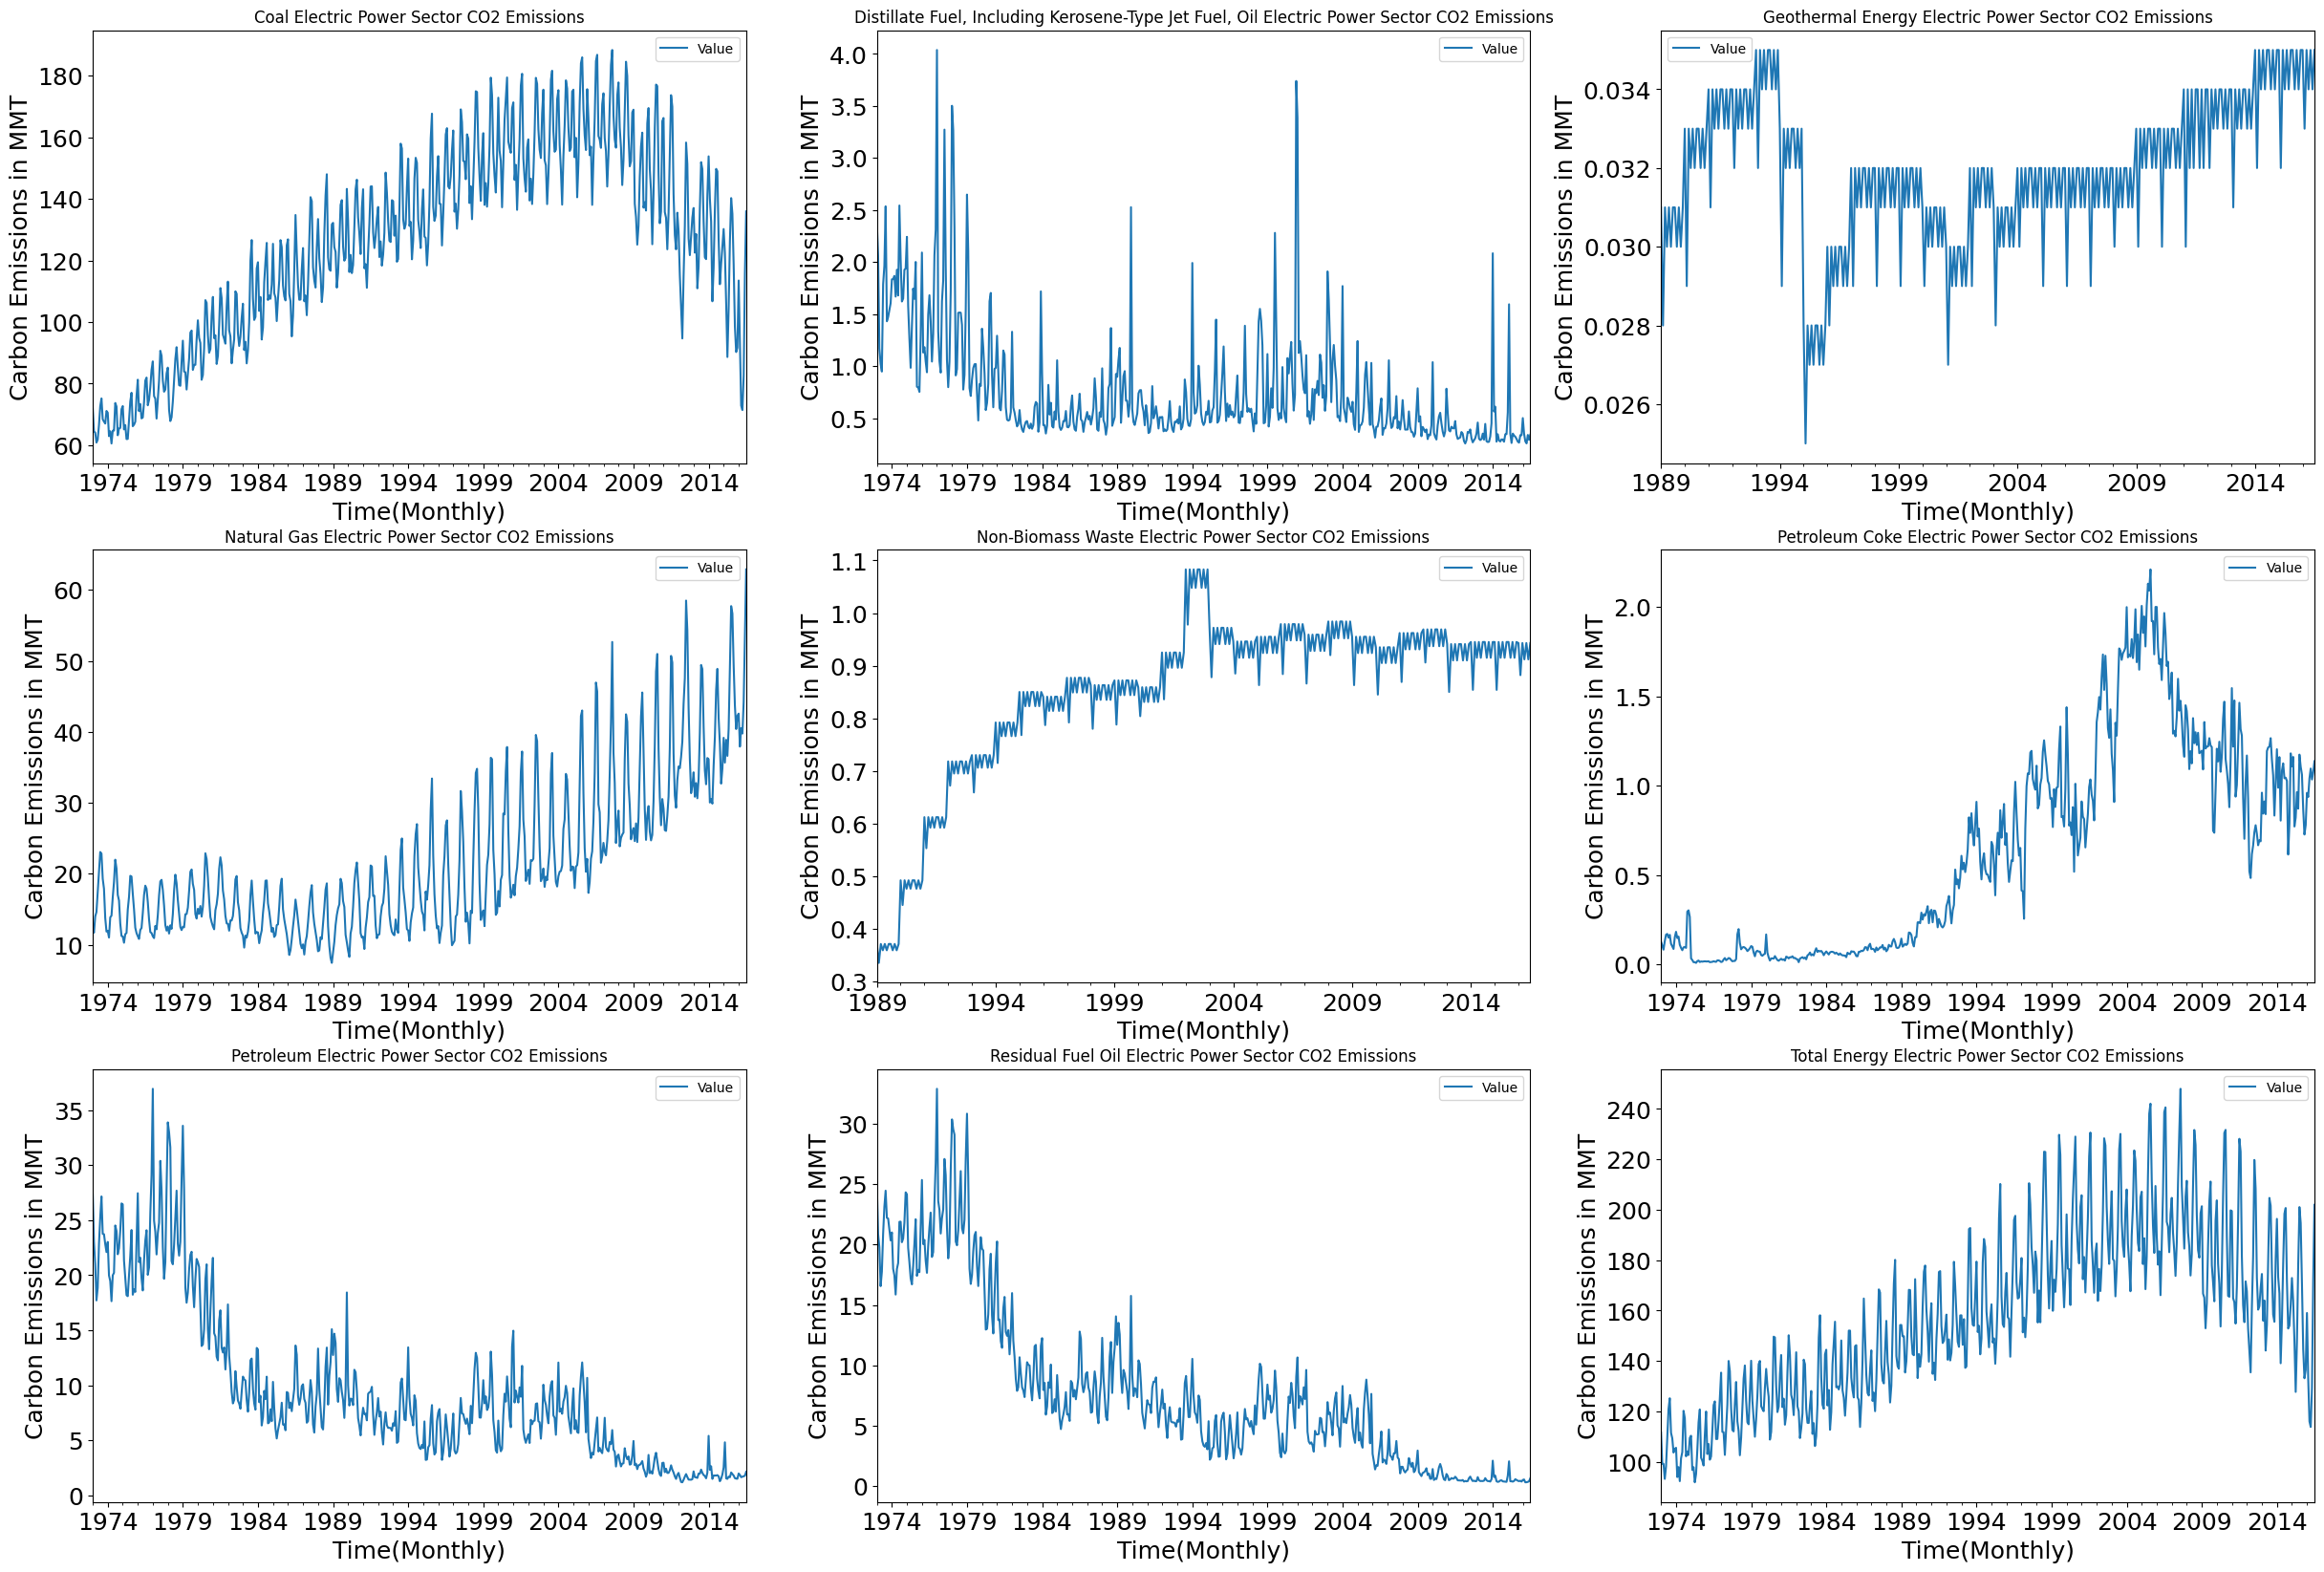

In [14]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Energy_sources, axes.flatten()):
    group.plot(y='Value',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In [15]:
CO2_per_source = df.groupby('Description')['Value'].sum().sort_values()

In [16]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [17]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

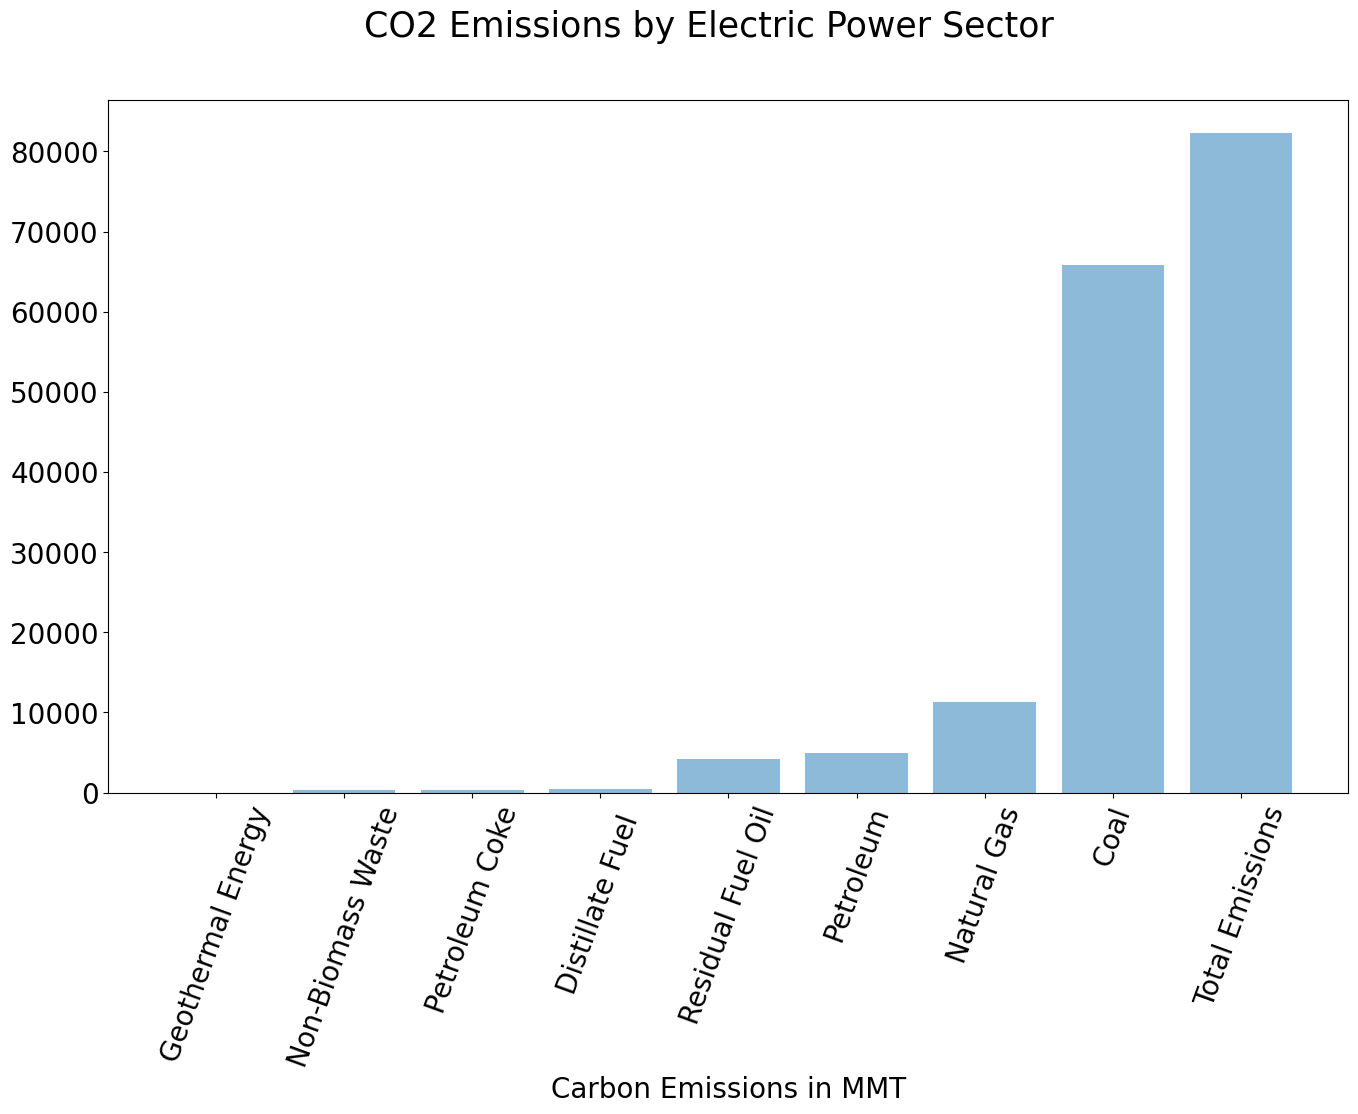

In [18]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

In [19]:
Emissions = df.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)
mte_df = pd.DataFrame(mte, columns=['Natural Gas Electric Power Sector CO2 Emissions'])
mte_df.head()

,Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,
1973-01-31,12.175
1973-02-28,11.708
1973-03-31,13.994
1973-04-30,14.627
1973-05-31,17.344


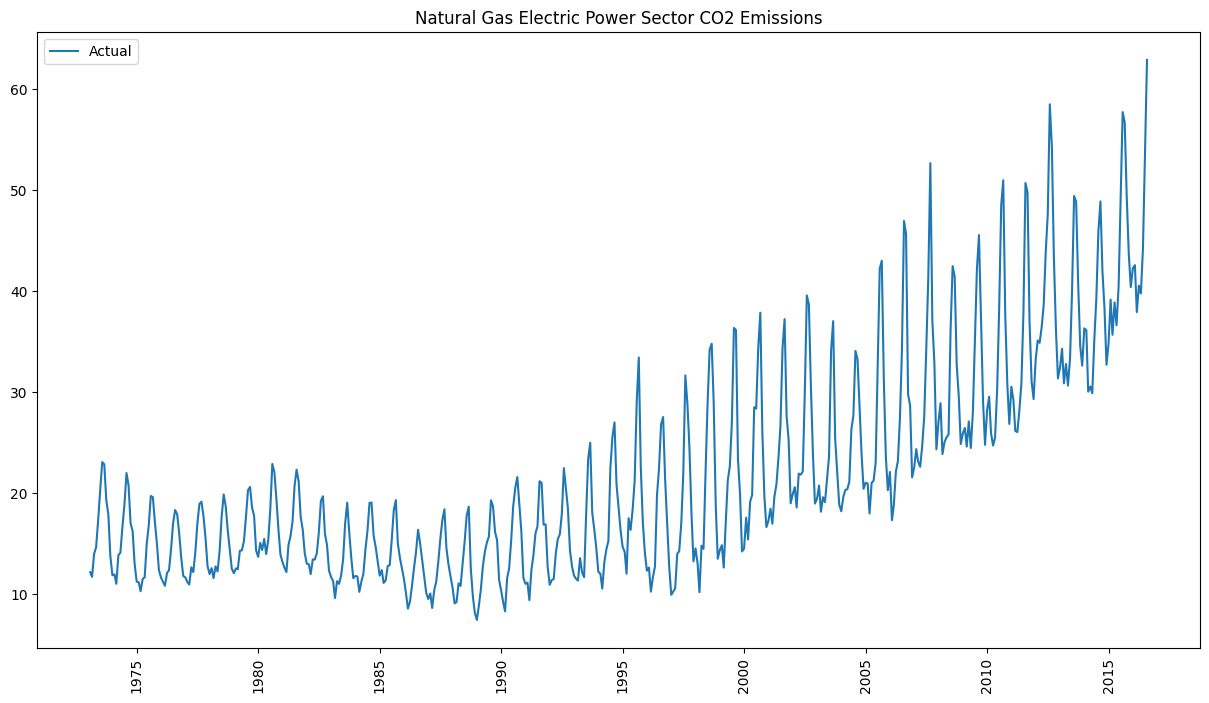

In [20]:
plt.figure(figsize=(15, 8))
plt.plot(mte_df, label = 'Actual')
plt.xticks(rotation = 'vertical')
plt.title('Natural Gas Electric Power Sector CO2 Emissions')
plt.legend()
plt.show()

## 1. Thực hiện Decomposition, trực quan hóa, nhận xét.

In [21]:
type(mte_df)

pandas.core.frame.DataFrame

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=mte_df, model='additive')
result

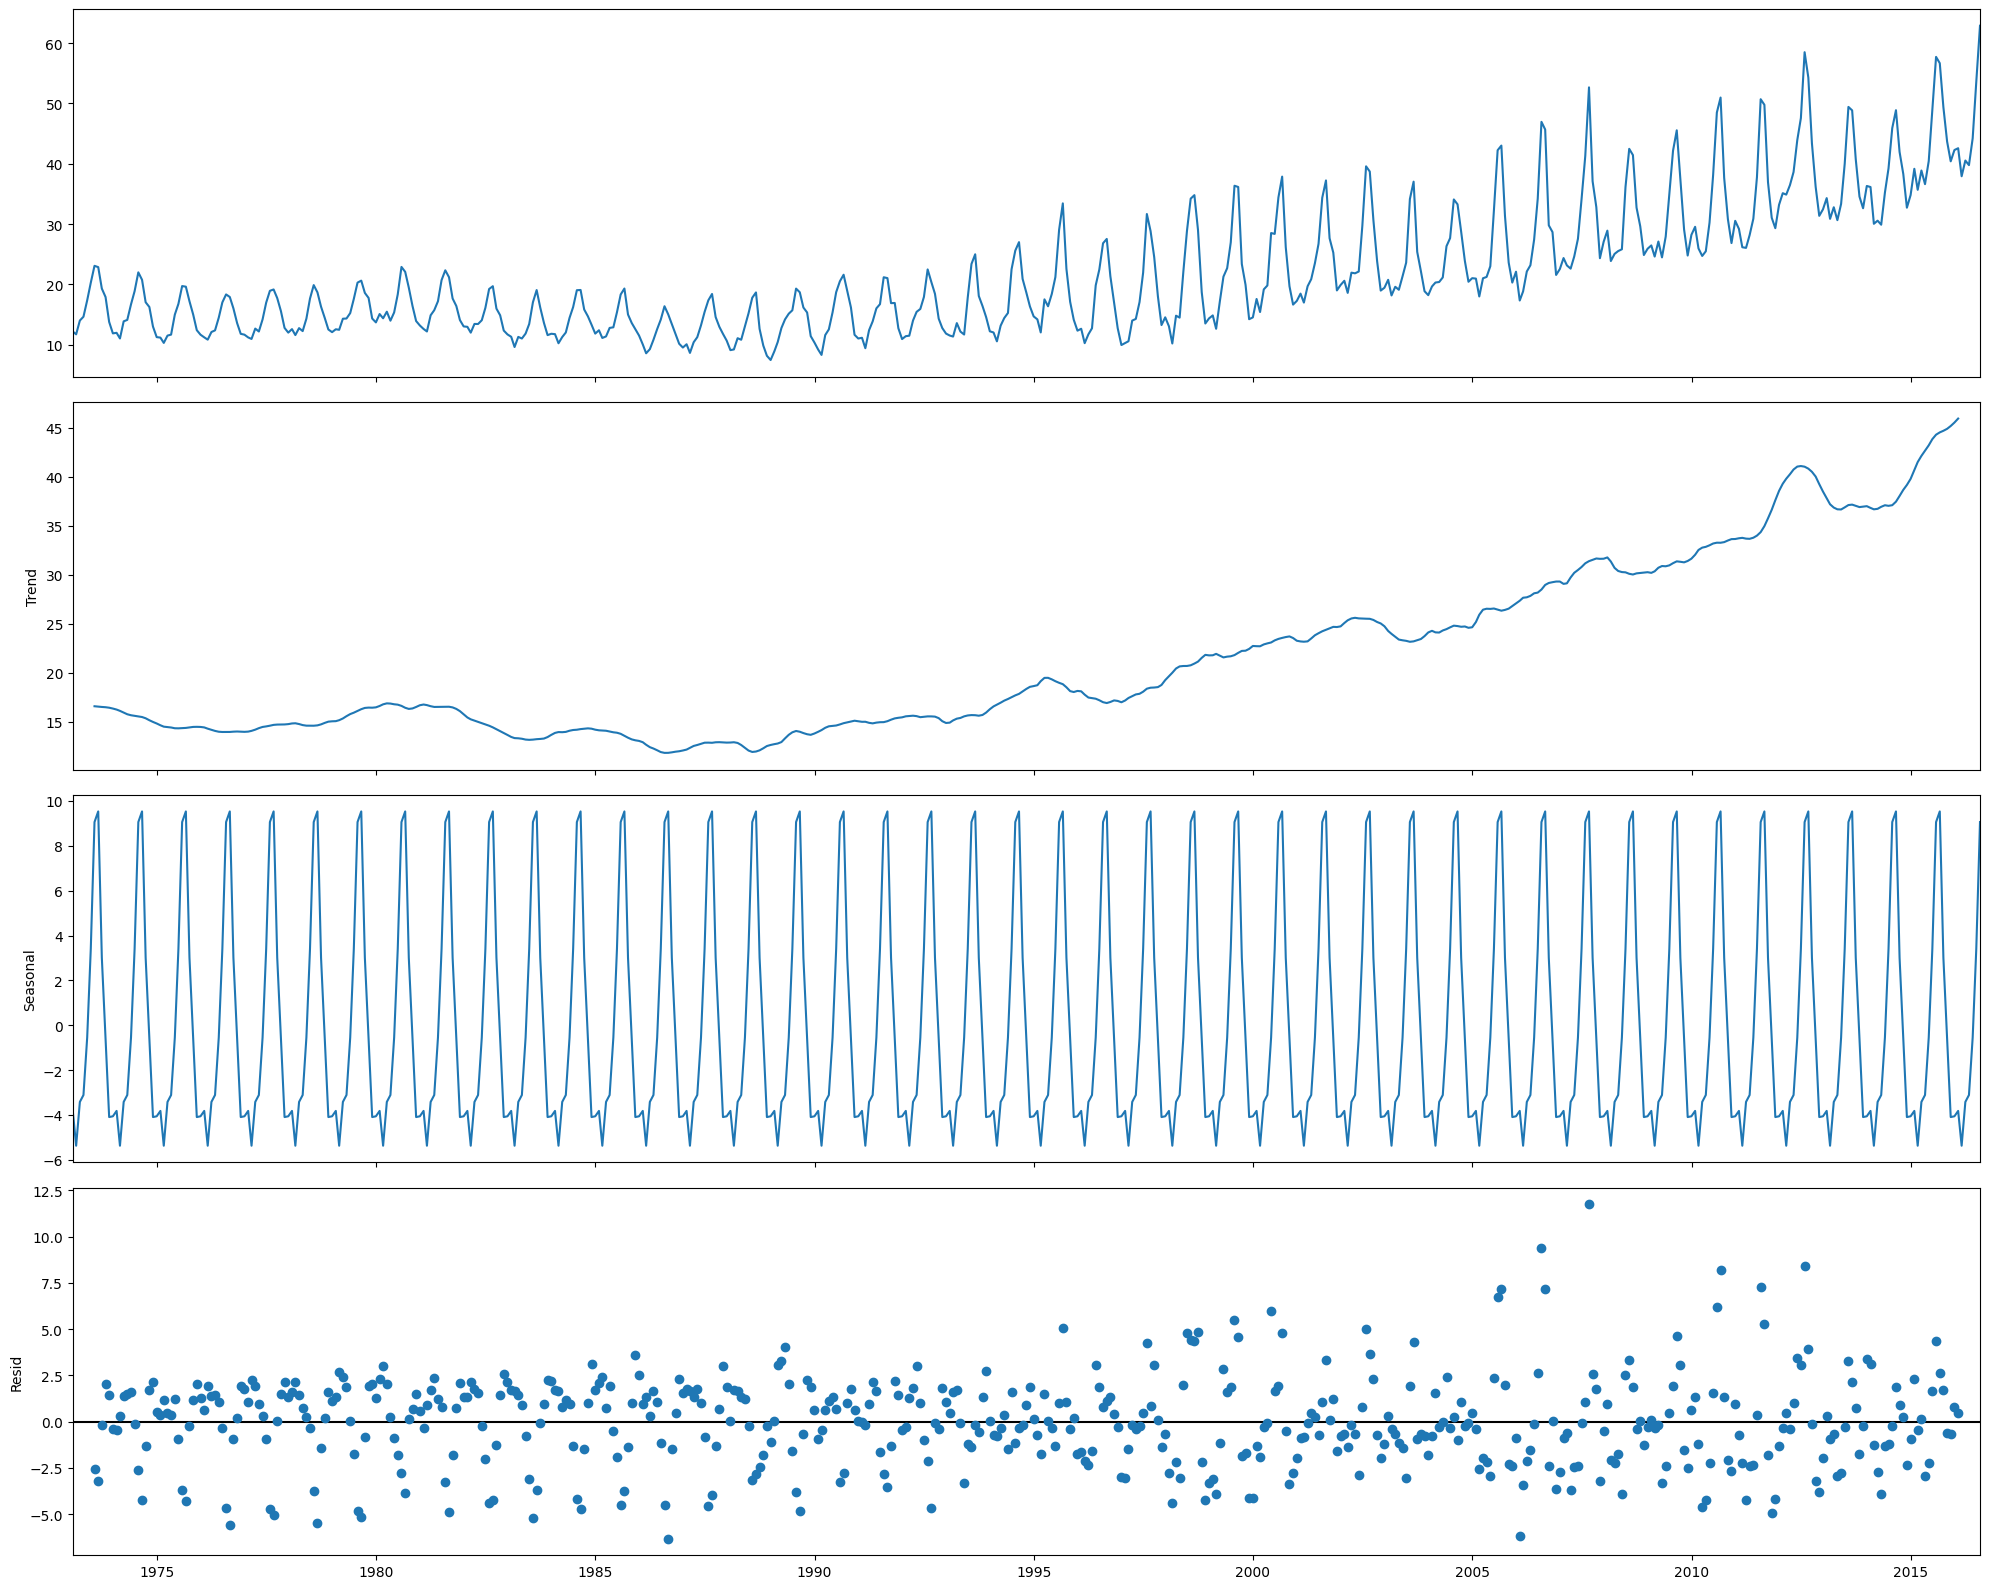

In [23]:
result.plot()
plt.show()

Nhận xét: Từ các biểu đồ, tập dữ liệu khí thải CO2 có một xu hướng rõ ràng, với biến đổi theo mùa. 

==> tập dữ liệu không ổn định.

## Áp dụng auto_arima để xây dựng mô hình

In [24]:
from pmdarima import auto_arima

In [25]:
stepwise_model = auto_arima(mte_df, start_p= 1, start_q= 1,
                            max_p=5, max_q =5, m=12,
                            start_P=1 , seasonal=True,
                            d=1 , D=1 , trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2054.286, Time=3.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2332.657, Time=0.29 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2181.357, Time=0.78 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2090.016, Time=1.91 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2052.378, Time=3.77 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2246.348, Time=1.32 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2054.272, Time=17.32 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2140.515, Time=1.81 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2056.153, Time=24.57 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2099.696, Time=0.53 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2053.999, Time=5.45 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=2053.898, Time=6.83 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2115.132, Time=1.06 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=2071.845, Time=2.23 sec
 ARIMA(2,1,0)(0,1

In [26]:
print(stepwise_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  523
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1022.189
Date:                            Sun, 29 Oct 2023   AIC                           2052.378
Time:                                    15:52:51   BIC                           2069.316
Sample:                                01-31-1973   HQIC                          2059.019
                                     - 07-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6707      0.039     17.127      0.000       0.594       0.747
ma.L1         -0.9542      0.020   

In [27]:
print(stepwise_model. aic())

2052.3784376107265


## 2. Tạo dữ liệu train/test sao cho test bao gồm dữ liệu 3 năm cuối cùng.

In [28]:
mte_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 1973-01-31 to 2016-07-31
Freq: M
Data columns (total 1 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Natural Gas Electric Power Sector CO2 Emissions  523 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [29]:
# 3 năm = 36 tháng
test_start_date = mte_df.index[-36]
test_start_date

Timestamp('2013-08-31 00:00:00', freq='M')

In [30]:
train = mte_df.loc['1973-01-31':'2013-08-31']
test = mte_df.loc['2013-08-31':]

In [31]:
test

,Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,
2013-08-31,48.842
2013-09-30,40.751
2013-10-31,34.547
2013-11-30,32.614
2013-12-31,36.308
2014-01-31,36.133
2014-02-28,30.036
2014-03-31,30.554
2014-04-30,29.885


In [32]:
len(test)

36

In [33]:
len(train)

488

### Bước 2: fit mô hình

In [34]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

### Bước 3: dự đoán kết quả:

In [35]:
test_forecast = stepwise_model.predict(n_periods=len(test))

In [36]:
test_forecast

2013-09-30    39.036825
2013-10-31    33.966556
2013-11-30    30.459998
2013-12-31    33.220669
2014-01-31    34.507721
2014-02-28    32.328076
2014-03-31    33.654688
2014-04-30    33.925386
2014-05-31    37.423805
2014-06-30    43.751227
2014-07-31    53.730214
2014-08-31    53.511773
2014-09-30    42.526941
2014-10-31    36.690849
2014-11-30    32.687126
2014-12-31    35.125042
2015-01-31    36.202563
2015-02-28    33.886893
2015-03-31    35.125200
2015-04-30    35.338569
2015-05-31    38.799772
2015-06-30    45.103034
2015-07-31    55.066335
2015-08-31    54.837713
2015-09-30    43.846270
2015-10-31    38.005886
2015-11-30    33.999378
2015-12-31    36.435485
2016-01-31    37.511832
2016-02-29    35.195400
2016-03-31    36.433211
2016-04-30    36.646260
2016-05-31    40.107254
2016-06-30    46.410380
2016-07-31    56.373594
2016-08-31    56.144914
Freq: M, dtype: float64

In [46]:
forecast_table = pd.DataFrame(test_forecast, index=test.index, columns=['Prediction'])
df_merge = test.join(forecast_table)
df_merge

,Natural Gas Electric Power Sector CO2 Emissions,Prediction
YYYYMM,,
2013-08-31,48.842,NaN
2013-09-30,40.751,39.036825
2013-10-31,34.547,33.966556
2013-11-30,32.614,30.459998
2013-12-31,36.308,33.220669
2014-01-31,36.133,34.507721
2014-02-28,30.036,32.328076
2014-03-31,30.554,33.654688
2014-04-30,29.885,33.925386


In [45]:
forecast_table

,Prediction
YYYYMM,
2013-08-31,NaN
2013-09-30,39.036825
2013-10-31,33.966556
2013-11-30,30.459998
2013-12-31,33.220669
2014-01-31,34.507721
2014-02-28,32.328076
2014-03-31,33.654688
2014-04-30,33.925386


In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
mean_absolute_error(test, test_forecast)

5.1594065781083875

### Bước 4: trực quan hóa dữ liệu

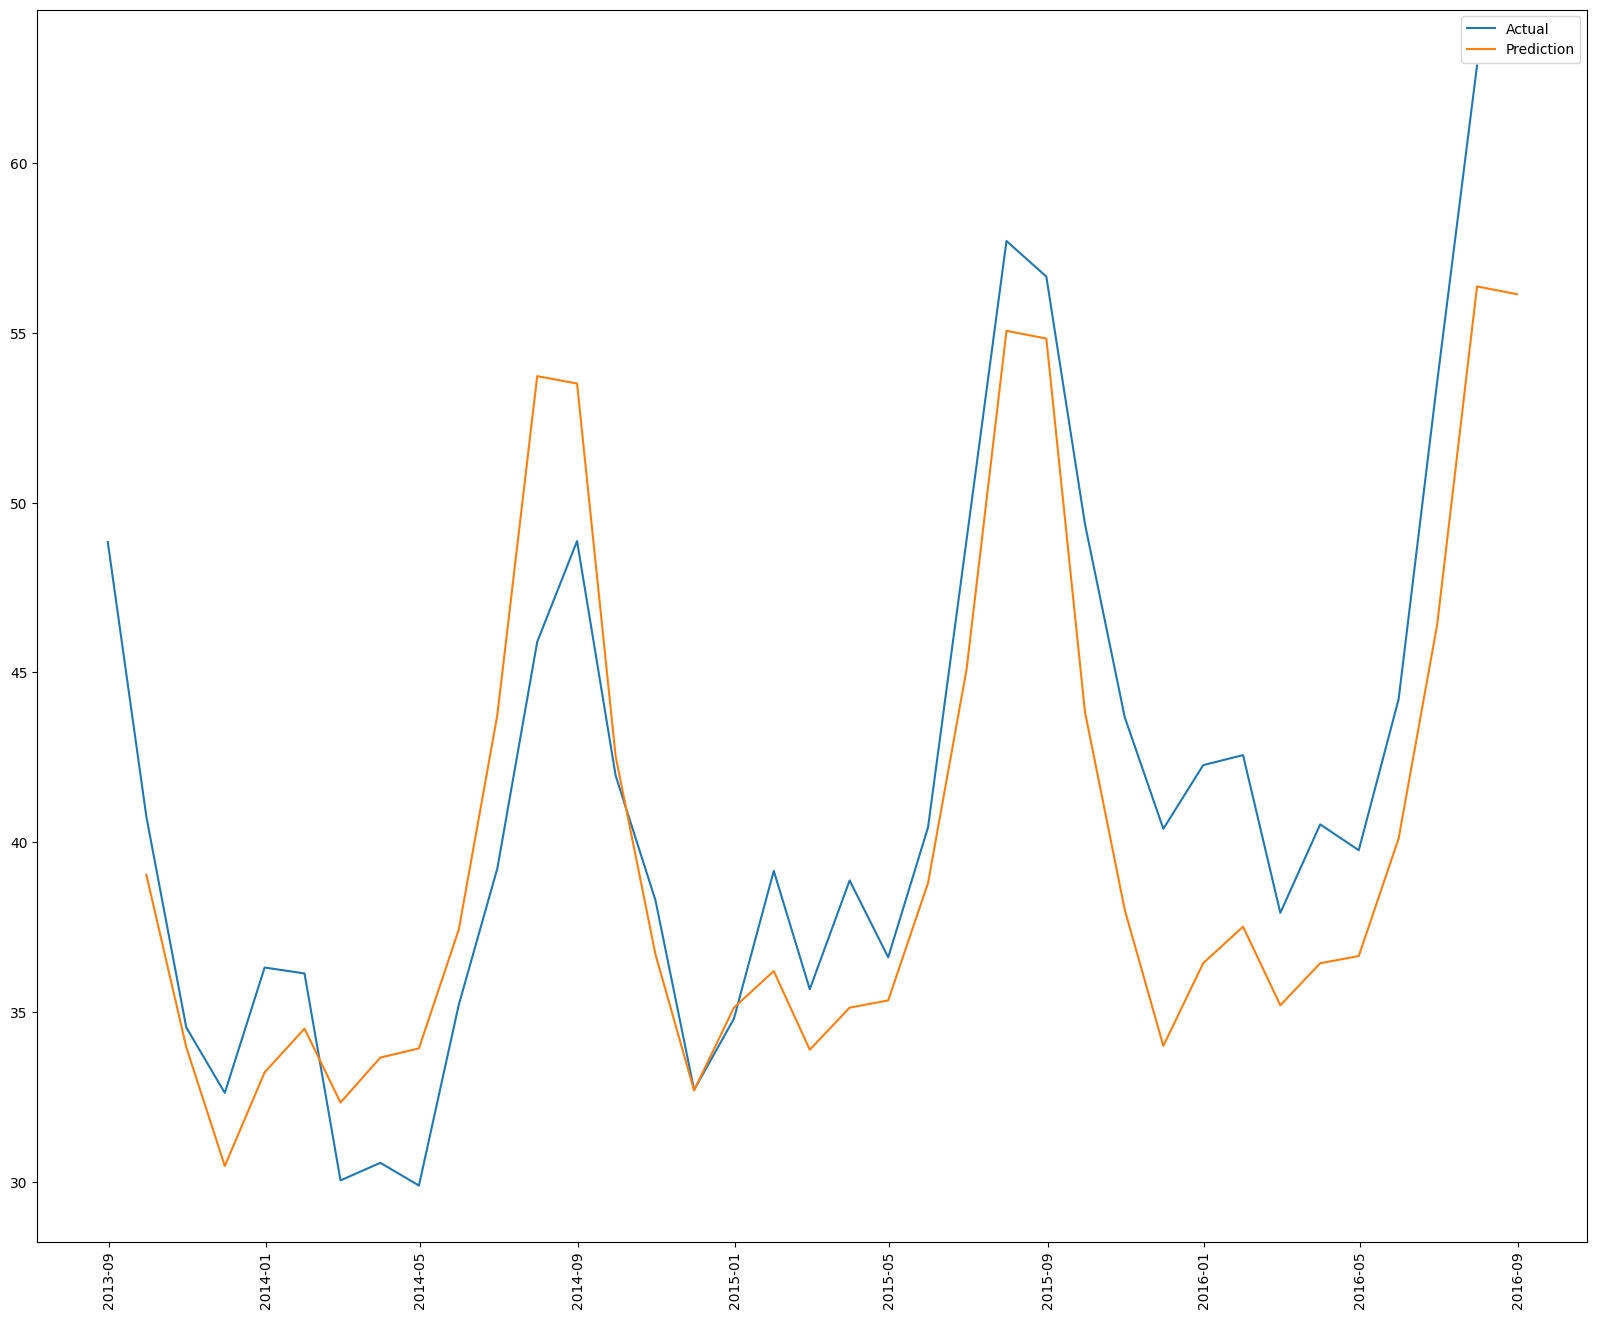

In [40]:
plt.plot(test, label='Actual')
plt.plot(test_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

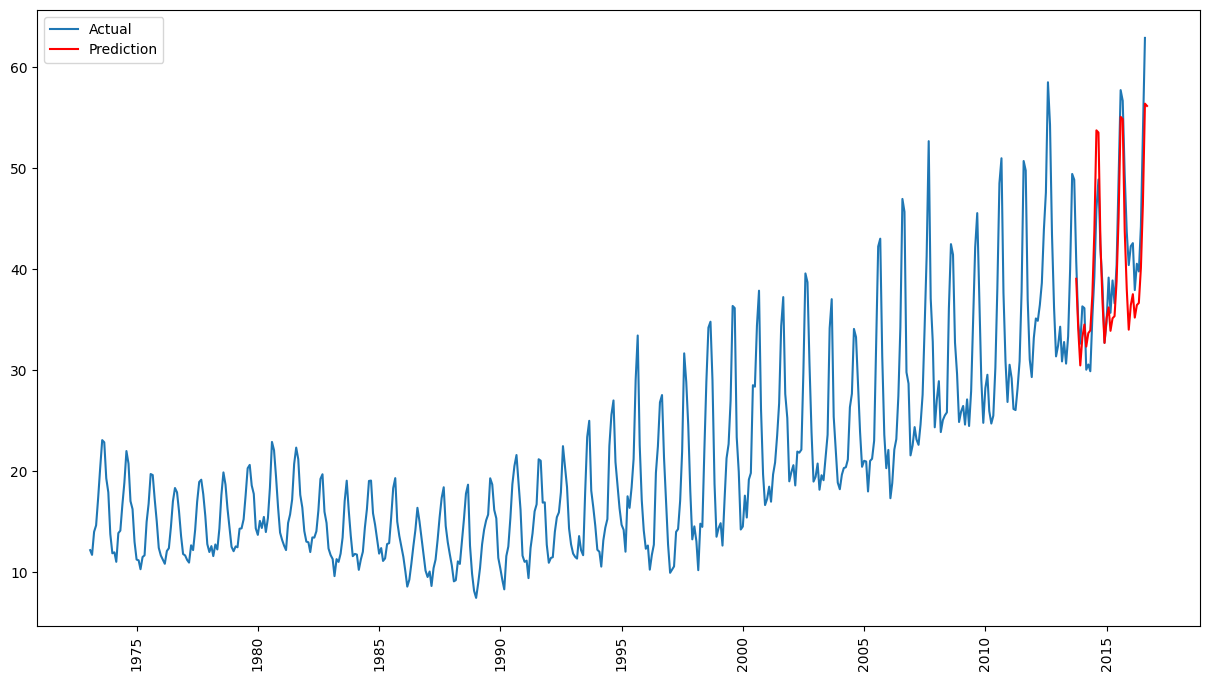

In [41]:
plt.figure(figsize=(15, 8))
plt.plot(mte_df, label = 'Actual')
plt.plot(test_forecast, label = 'Prediction' , color='red')
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

#### Nhận xét:

Dựa vào dữ liệu và dự đoán, có một số nhận xét có thể được thực hiện:

Có sự biến động mùa vụ rõ rệt trong dữ liệu khí thải CO2. Giá trị của mỗi tháng có sự biến đổi theo mùa, tăng giảm theo mùa hoặc theo chu kỳ thời tiết.

Dự đoán có xu hướng theo dõi xu hướng tăng giảm của dữ liệu gốc, nhưng có thể có sự sai lệch so với thực tế. Ví dụ, trong một số tháng, dự đoán gần với giá trị thực tế, trong khi ở những tháng khác, dự đoán có sai lệch lớn hơn hoặc nhỏ hơn giá trị thực tế. Nguyên nhân có thể do ảnh hưởng của dịch bệnh Covid

Trong trường hợp này, có thể thấy mô hình dự đoán gần đúng xu hướng tăng giảm tổng lượng khí thải CO2, nhưng nó có thể cần được điều chỉnh hoặc tối ưu hóa để cải thiện tính chính xác của dự đoán.

Cần xem xét các yếu tố khác, chẳng hạn như sự ảnh hưởng của các sự kiện đặc biệt hoặc sự biến đổi trong xu hướng sử dụng năng lượng, để đảm bảo rằng mô hình có thể dự đoán hiệu quả trong tương lai.

### Dự đoán 36 tháng sau

In [42]:
stepwise_model.fit(mte_df)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [43]:
future_forecast = stepwise_model.predict(n_periods=36)
future_forecast

2016-08-31    61.579862
2016-09-30    51.666957
2016-10-31    45.461273
2016-11-30    41.106387
2016-12-31    43.145309
2017-01-31    44.240288
2017-02-28    40.345470
2017-03-31    42.145633
2017-04-30    41.401451
2017-05-31    45.429511
2017-06-30    52.648697
2017-07-31    61.695331
2017-08-31    61.468778
2017-09-30    52.276603
2017-10-31    46.554317
2017-11-30    42.523648
2017-12-31    44.780025
2018-01-31    46.020852
2018-02-28    42.223854
2018-03-31    44.089626
2018-04-30    43.389449
2018-05-31    47.447022
2018-06-30    54.686004
2018-07-31    63.745914
2018-08-31    63.528266
2018-09-30    54.342063
2018-10-31    48.623783
2018-11-30    44.595801
2018-12-31    46.853980
2019-01-31    48.096015
2019-02-28    44.299829
2019-03-31    46.166144
2019-04-30    45.466331
2019-05-31    49.524149
2019-06-30    56.763295
2019-07-31    65.823315
Freq: M, dtype: float64

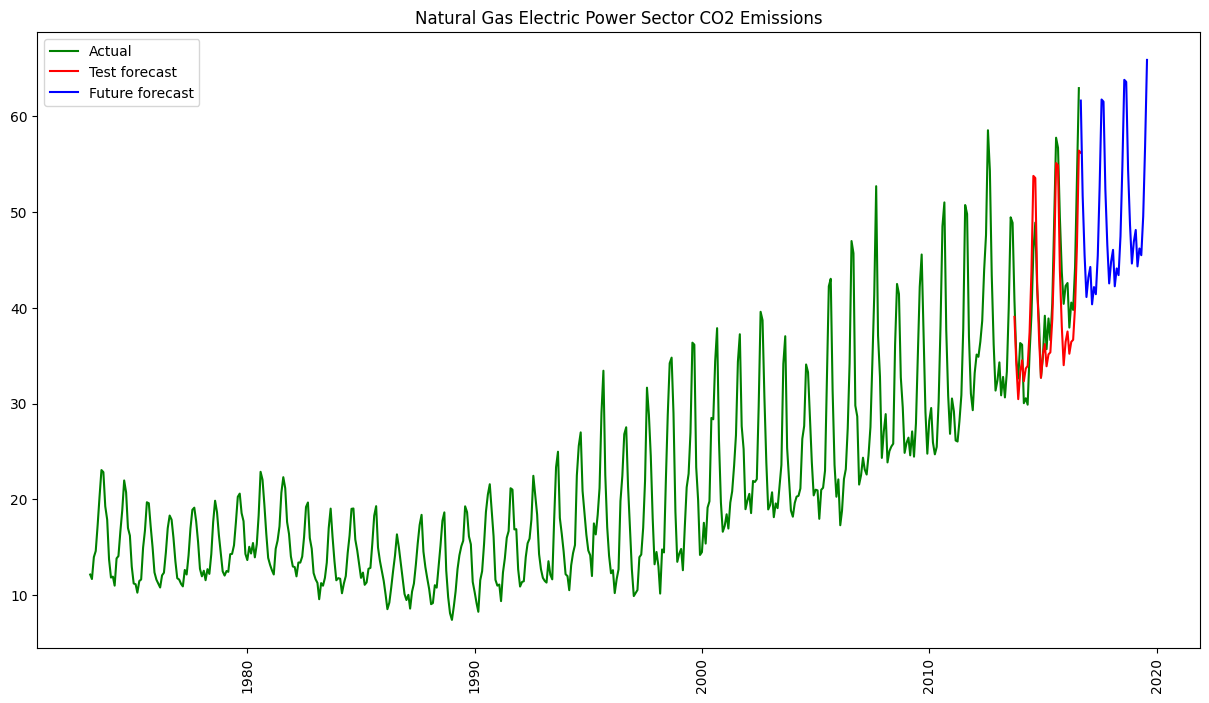

In [44]:
plt.figure(figsize=(15, 8))
plt.plot(mte_df, label = 'Actual', color='green')
plt.plot(test_forecast, label = 'Test forecast' , color='red')
plt.plot(future_forecast, label = 'Future forecast' , color='blue')
plt.xticks(rotation = 'vertical')
plt.title('Natural Gas Electric Power Sector CO2 Emissions')
plt.legend()
plt.show()